# Udactity Data Analyst

## Bivariate Visualizations Excercises

### Scatterplots

If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
fuel_econ = pd.read_csv('fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.sample(3)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
2197,36452,Chevrolet,Sonic,2016,Compact Cars,Front-Wheel Drive,Manual 5-spd,Regular Gasoline,4,1.8,0,91,26.1013,33.9000,33.8960,49.2000,29.1141,305,7,7
3353,38682,Hyundai,Elantra SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.0,0,96,29.0422,38.2345,38.3341,56.5397,32.5978,272,8,8
443,33045,BMW,M6 Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,8,4.4,88,0,14.6821,18.1212,21.5792,30.0000,17.1485,516,4,4


One basic way of creating a scatterplot is through Matplotlib's `scatter` function:

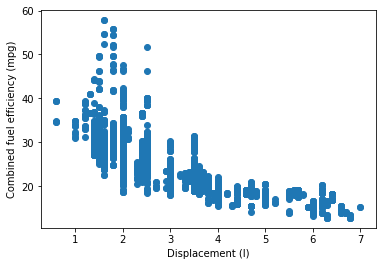

In [5]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');

Seaborn's `regplot` function combines scatterplot creation with regression function fitting:

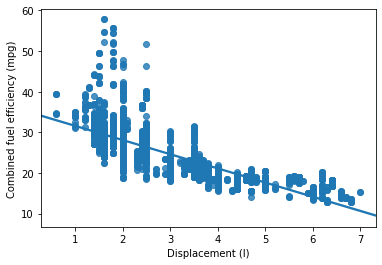

In [8]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');

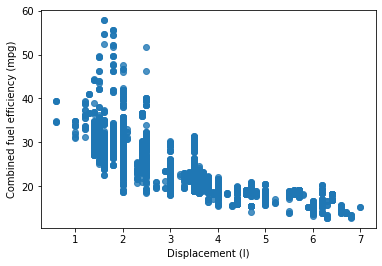

In [9]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', fit_reg = False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');

### Overplotting, Transparency, and Jitter

If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

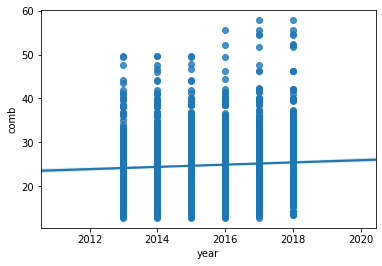

In [10]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb');

In cases like this, we may want to employ `transparency` and `jitter` to make the scatterplot more informative. 
We can add jitter to move the position of each point slightly from its true value. This is not a direct option in matplotlib's `scatter` function, but is a built-in option with seaborn's `regplot` function. x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made:

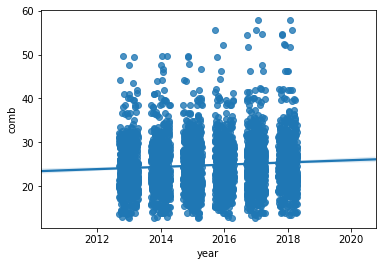

In [11]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3);

Transparency can be added to a `scatter` call by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque). In seaborn's regplot, to set the transparency, we need to assign a dictionary to the "scatter_kws" parameter. This is necessary so that transparency is specifically associated with the `scatter` component of the `regplot` function.

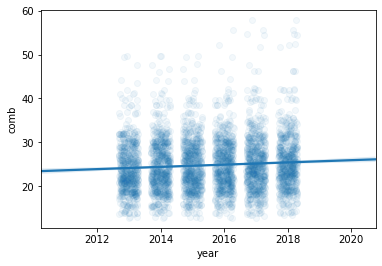

In [17]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3, scatter_kws = {'alpha': 1/20});

### Heat Maps
A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's `hist2d` function.

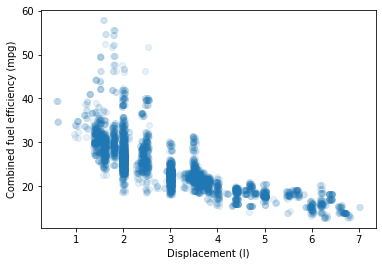

In [18]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter = 0.04, 
           scatter_kws = {'alpha': 1/10}, fit_reg = False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');

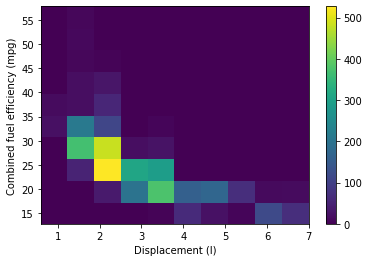

In [19]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb');
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');

In [23]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


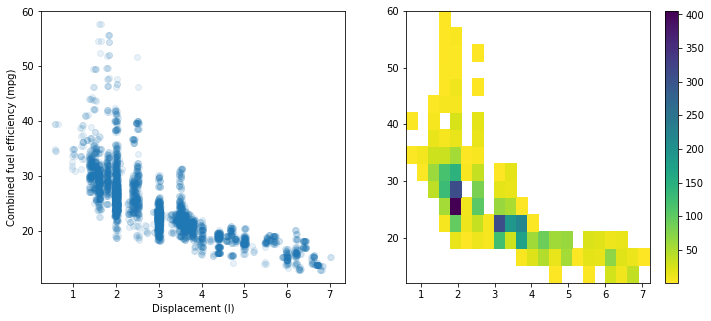

In [24]:
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter = 0.04, 
           scatter_kws = {'alpha': 1/10}, fit_reg = False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');

# right plot: heat map with bin edges between values
plt.subplot(1, 2, 2)
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58 +3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r',
          bins = [bins_x, bins_y])
plt.colorbar();

Notice that since we have two variables, the "bins" parameter takes a list of two bin edge specifications, one for each dimension. We add a `colorbar` function call to add a colorbar to the side of the plot, showing the mapping from counts to colors.